# Analysis

Analysis notebook of our output results

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.style.use(os.path.join(os.getcwd(), 'charging-network.mplstyle'))

### Plot Heatmap for Rhode Island Nodes as a test

In [2]:
# load in the data
filepath = os.path.join('sampleData', 'rhode-island-out.pkl')

with open(filepath, 'rb') as f:
    data = np.array(pickle.load(f), dtype=object)
    
centers = np.array([np.array(d) for d in data[:,0]])
nodes = data[:,1]

print(centers[0])
print(nodes[0])

[ 40.77974078 -73.92521245]
      type          id        lat    long  \
1355  node  1437051378  40.743509 -73.971   

                                                tagKeys  \
1355  [amenity, cargo, ferry, name, public_transport...   

                                                tagVals  hasAmenity  
1355  [ferry_terminal, passenger;bicycle, yes, East ...        True  


Text(0.5, 0, 'Longitude [deg]')

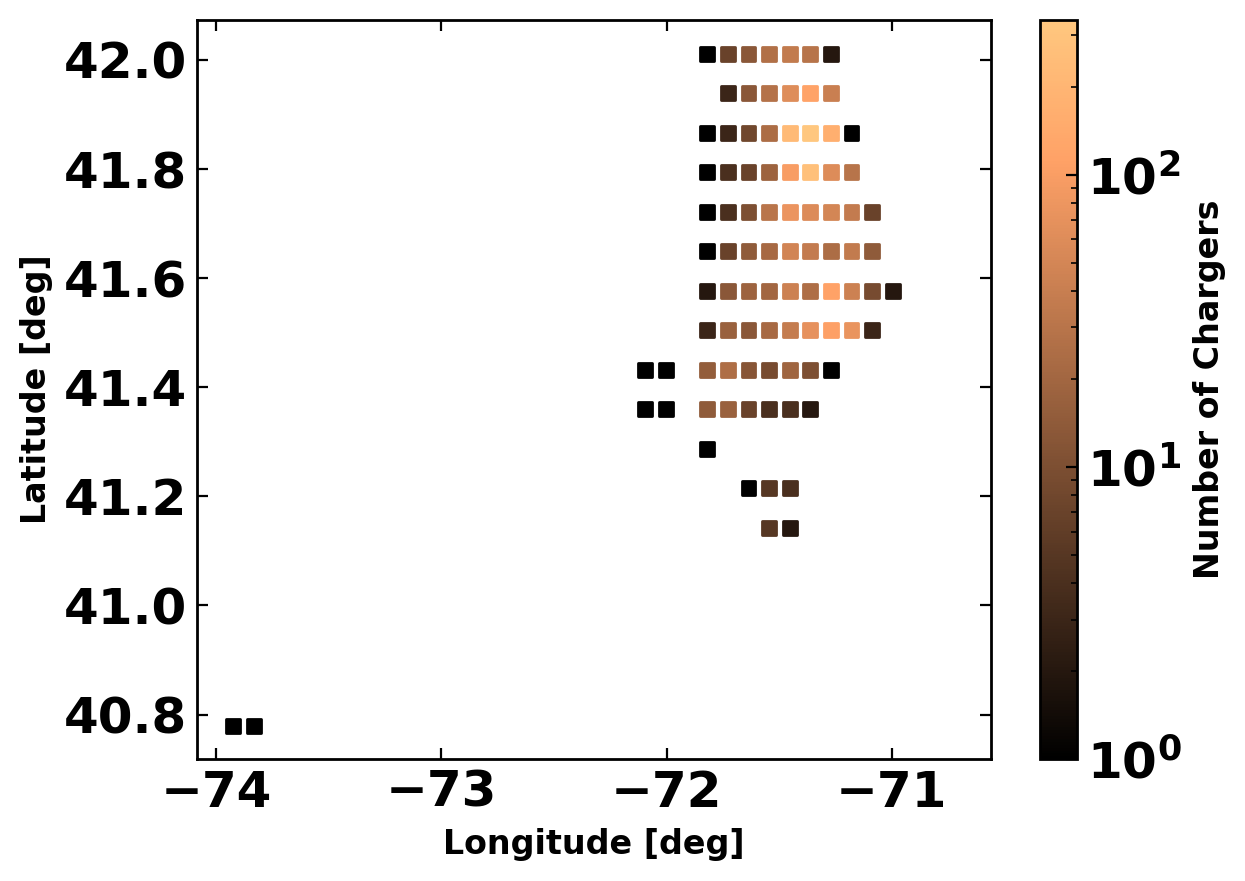

In [3]:
n = [len(row) for row in nodes]

lat = centers[:,0]
long = centers[:,1]

fig, ax = plt.subplots()
im = ax.scatter(long, lat, c=n, s=25, marker='s', cmap='copper', norm=LogNorm())
fig.colorbar(im, label='Number of Chargers')
ax.set_ylabel('Latitude [deg]')
ax.set_xlabel('Longitude [deg]')

In [5]:
good = [item for item in nodes if len(item) > 0]
allNodes = pd.concat(good)

allNodes.to_csv('sampleData/rhode-island-node-coordinates.csv', header=True, index=False)